## Check like coverage
Controllo che tutte le pagine abbiano i like e non solo le pagine piu grosse, in tal caso uso i commenti per fare i lcalcolo dell'outreach

/home/jacoponudo/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


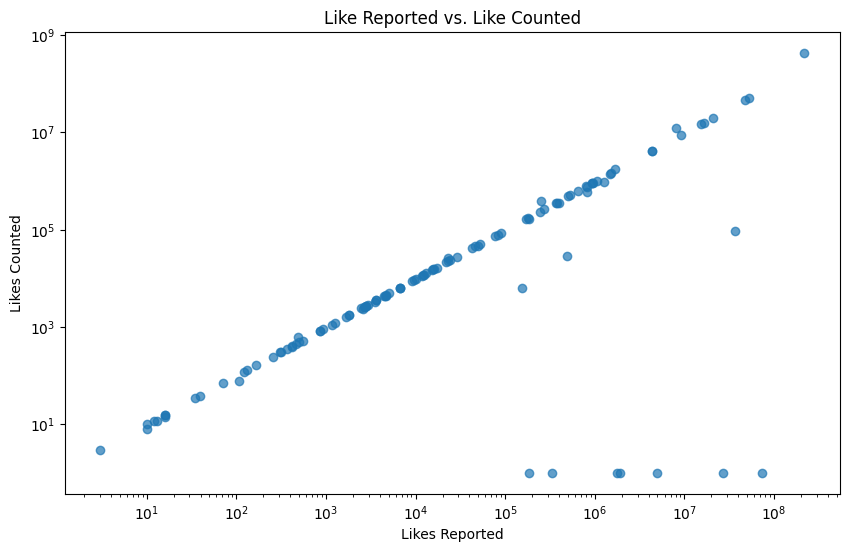

In [1]:
import pandas as pd

# Load posts data and calculate reported likes per page
posts = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/sample_posts.csv', encoding='ISO-8859-1')
likes_reported = posts.groupby('page_id')['likes_count'].sum().reset_index().rename(columns={'likes_count': 'likes_reported'})

# Load likes data and count likes per page
likes = pd.read_csv('/home/jacoponudo/Documents/Size_effects/DATA/sample_likes.csv', encoding='ISO-8859-1',usecols=['post_id'])
likes = likes[['post_id']]
posts = posts[['post_id', 'page_id']]

# Merge likes with posts data to count likes per page
merged_data = pd.merge(likes, posts, on='post_id', how='left')
likes_counted = merged_data.groupby('page_id').size().reset_index(name='likes_counted')

# Optional: Merge reported and counted likes into one DataFrame
final_data = pd.merge(likes_reported, likes_counted, on='page_id', how='outer')

import matplotlib.pyplot as plt

# Replace NaN values with 0
final_data.fillna(0, inplace=True)

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter( final_data['likes_reported']+1,final_data['likes_counted']+1, alpha=0.7)
plt.title('Like Reported vs. Like Counted')
plt.xlabel('Likes Reported')
plt.ylabel('Likes Counted')
plt.xscale('log')
plt.yscale('log')


plt.show()
